In [2]:
# pip install pydub

In [3]:
import numpy as np
import pandas as pd

In [4]:
from pydub import AudioSegment

In [5]:
song = AudioSegment.from_wav('voice_data/2021101110_54.wav')

In [6]:
print("Duration seconds: ", song.duration_seconds)
print("Duration miuntes: ", song.duration_seconds/60)
print("Frame rate      : ", song.frame_rate)
print("Channels        : ", song.channels)

Duration seconds:  3045.184036281179
Duration miuntes:  50.75306727135298
Frame rate      :  11025
Channels        :  1


In [7]:
song_array = np.array(song.get_array_of_samples())
print("dtype: ", song_array.dtype)
print("size : ", song_array.size)

dtype:  int16
size :  33573154


In [8]:
song_data = song_array

In [9]:
# x(t)
song_data

array([1, 1, 1, ..., 1, 1, 1], dtype=int16)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('ggplot')

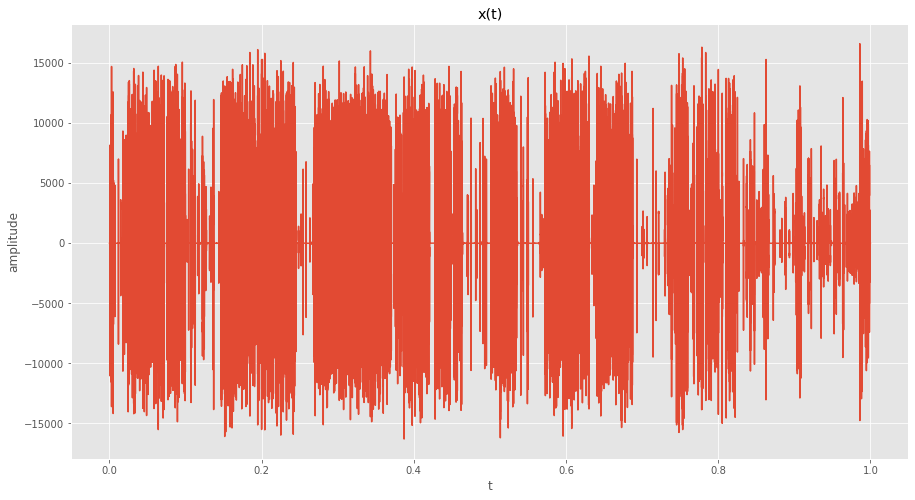

In [11]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

x_t = np.linspace(0,1,33573154)
ax.plot(x_t, song_data)
plt.title("x(t)")
plt.xlabel("t")
plt.ylabel("amplitude")
plt.show()

In [12]:
# x(t)_bar
song_data_avg = np.mean(song_data)
song_data_avg

-0.12129060022183201

In [13]:
# y(t) = x(t) - x(t)_bar
song_data_1 = song_data - song_data_avg
song_data_1

array([1.1212906, 1.1212906, 1.1212906, ..., 1.1212906, 1.1212906,
       1.1212906])

In [14]:
# y(t).mean =~ 0
np.mean(song_data_1)

2.0805086877120922e-14

In [15]:
# max(y(t))
song_data_1_max = np.max(song_data_1)
song_data_1_max

16610.121290600222

In [16]:
# min(y(t))
song_data_1_min = np.min(song_data_1)
song_data_1_min

-16300.878709399778

In [17]:
# z(t) = y(t) / ( max(y(t)) - min(y(t)) )
song_data_2 = song_data_1 / (song_data_1_max - song_data_1_min)
song_data_2

array([3.40703898e-05, 3.40703898e-05, 3.40703898e-05, ...,
       3.40703898e-05, 3.40703898e-05, 3.40703898e-05])

In [18]:
# z(t) =~ 0
np.mean(song_data_2)

4.0527766025783783e-19

In [19]:
# max(z(t)) - min(z(t)) = 1.0
np.max(song_data_2) - np.min(song_data_2)

1.0

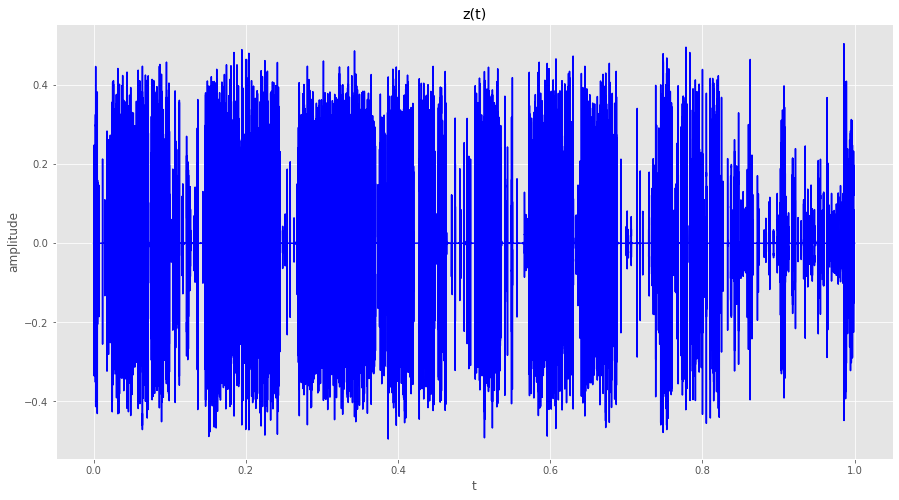

In [20]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

x_t = np.linspace(0,1,33573154)
ax.plot(x_t, song_data_2, color = 'b')
plt.title("z(t)")
plt.xlabel("t")
plt.ylabel("amplitude")
plt.show()

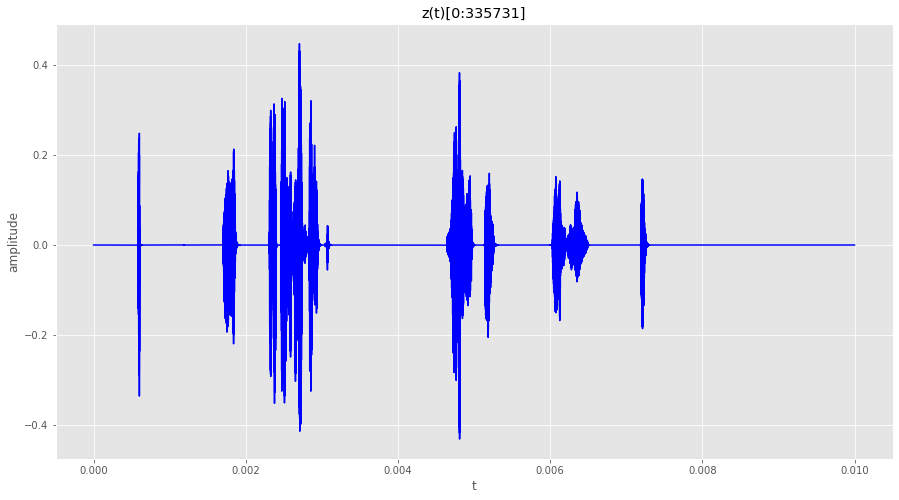

In [21]:
dd = 100
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

x_t = np.linspace(0,1,33573154)
d = int(33573154/dd)
ax.plot(x_t[0:d], song_data_2[0:d], color = 'b')
title = "z(t)[0:"+str(d)+"]"
plt.title(title)
plt.xlabel("t")
plt.ylabel("amplitude")
plt.show()

In [22]:
# Find the CF value
# x(t) = song_data_2
song_data_2

array([3.40703898e-05, 3.40703898e-05, 3.40703898e-05, ...,
       3.40703898e-05, 3.40703898e-05, 3.40703898e-05])

In [23]:
# step1. v(t)
v_t = np.diff(song_data_2)
v_t

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
v_t_df = pd.DataFrame(v_t)

In [25]:
v_t_df

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
33573148,0.0
33573149,0.0
33573150,0.0
33573151,0.0


In [26]:
z_t_df = pd.DataFrame(song_data_2)

In [27]:
z_t_df

,0
0,0.000034
1,0.000034
2,0.000034
3,0.000034
4,0.000034
...,...
33573149,0.000034
33573150,0.000034
33573151,0.000034
33573152,0.000034


In [28]:
df_concat = pd.concat([z_t_df, v_t_df],axis=1)

In [29]:
df_concat

,0,0
0,0.000034,0.0
1,0.000034,0.0
2,0.000034,0.0
3,0.000034,0.0
4,0.000034,0.0
...,...,...
33573149,0.000034,0.0
33573150,0.000034,0.0
33573151,0.000034,0.0
33573152,0.000034,0.0


In [38]:
df_concat.head(20001)

,0,0
0,0.000034,0.000000
1,0.000034,0.000000
2,0.000034,0.000000
3,0.000034,0.000000
4,0.000034,0.000000
...,...,...
19996,-0.207009,0.089119
19997,-0.117890,0.128802
19998,0.010912,0.024430
19999,0.035341,0.027559


In [72]:
# step1.5. v_t[i+1] - v_t[i]
a_t_normal = np.diff(v_t)
a_t_normal

array([0., 0., 0., ..., 0., 0., 0.])

In [73]:
print("v_t.size = ",v_t.size,"\n","a_t_normal.size = ", a_t_normal.size)

v_t.size =  33573153 
 a_t_normal.size =  33573152


In [74]:
# step2. a(t)
a_t = []
#a_t_cmp = []
for i in range(v_t.size -1):
    if i==19999:
        print("Ex i = ",i)
        print("abs(v_t[",i+1,"])= ", abs(v_t[i+1]))
        print("abs(v_t[",i,"]))= ", abs(v_t[i]))
        print("(abs(v_t[",i+1,"]) + abs(v_t[",i,"])) / (2 * abs(v_t[",i+1,"]) * abs(v_t[",i,"]))= ", (abs(v_t[i+1]) + abs(v_t[i])) / (2 * abs(v_t[i+1]) * abs(v_t[i])))
        print("-----------------------------------------")
        print("(v_t[",i+1,"])= ", (v_t[i+1]))
        print("(v_t[",i,"]))= ", (v_t[i]))
        print("(v_t[",i+1,"] - v_t[",i,"])= ", (v_t[i+1] - v_t[i]))
        print("-----------------------------------------")
        print("((abs(v_t[",i+1,"]) + abs(v_t[",i,"])) / (2 * abs(v_t[",i+1,"]) * abs(v_t[",i,"]))) * (v_t[",i+1,"] - v_t[",i,"])= ", ((abs(v_t[i+1]) + abs(v_t[i])) / (2 * abs(v_t[i+1]) * abs(v_t[i]))) * (v_t[i+1] - v_t[i]))
    
    if (2 * abs(v_t[i+1]) * abs(v_t[i]))==0:
        #a_t.append(np.nan)
        a_t.append(np.nan)
    else:
        a_coeff = ((abs(v_t[i+1]) + abs(v_t[i])) / (2 * abs(v_t[i+1]) * abs(v_t[i])))
        #a_t.append(a_coeff * (v_t[i+1] - v_t[i]))
        a_t.append(a_coeff * a_t_normal[i])

Ex i =  19999
abs(v_t[ 20000 ])=  0.08790374039075083
abs(v_t[ 19999 ]))=  0.027559174744006577
(abs(v_t[ 20000 ]) + abs(v_t[ 19999 ])) / (2 * abs(v_t[ 20000 ]) * abs(v_t[ 19999 ]))=  23.830818487083018
-----------------------------------------
(v_t[ 20000 ])=  -0.08790374039075083
(v_t[ 19999 ]))=  0.027559174744006577
(v_t[ 20000 ] - v_t[ 19999 ])=  -0.1154629151347574
-----------------------------------------
((abs(v_t[ 20000 ]) + abs(v_t[ 19999 ])) / (2 * abs(v_t[ 20000 ]) * abs(v_t[ 19999 ]))) * (v_t[ 20000 ] - v_t[ 19999 ])=  -2.7515757725658743


In [71]:
# if a_t == a_t_cmp:
#     print(1)
# else:
#     print(0)

0


/home/harada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """Entry point for launching an IPython kernel.


In [75]:
a_t[19999]

-2.7515757725658743

In [92]:
a_t[20000]

-0.9822863415018707

In [43]:
#a_t_cmp[19999]

-2.7515757725658743

In [76]:
type(a_t)

list

In [77]:
import copy
a_t_cp = copy.copy(a_t)

In [78]:
a_t_cp[19999]

-2.7515757725658743

In [79]:
type(a_t_cp)

list

In [80]:
a_t_cp = np.array(a_t_cp)

In [81]:
type(a_t_cp)

numpy.ndarray

In [82]:
print(type(song_data_2), song_data_2.size)

<class 'numpy.ndarray'> 33573154


In [83]:
print(type(a_t_cp), a_t_cp.size)

<class 'numpy.ndarray'> 33573152


In [87]:
cf_t_test = np.where(song_data_2[0:33573152] > 0, -1 * a_t_cp, a_t_cp)

In [89]:
song_data_2[19999]

0.03534141443894812

In [88]:
cf_t_test[19999]

2.7515757725658743

In [90]:
song_data_2[20000]

0.0629005891829547

In [91]:
cf_t_test[20000]

0.9822863415018707

In [93]:
cf_t_test

array([nan, nan, nan, ..., nan, nan, nan])

In [94]:
cf_t_test.size

33573152

In [95]:
cf_t = copy.copy(cf_t_test)

In [96]:
cf_t.size

33573152

In [100]:
cf = np.nanmean(cf_t)

In [101]:
cf

0.6254907106146146